## Initialize and Import Data

In [32]:
# Initialize the environment
import time
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
sns.set(style="darkgrid")

In [2]:
#Import the data
df11_2018 = pd.read_csv("~/projects/spotify-song-popularity/SpotifyAudioFeaturesNov2018.zip")

In [3]:
df4_2019 = pd.read_csv("~/projects/spotify-song-popularity/SpotifyAudioFeaturesApril2019.zip")

## Cleaning

During exploration, I discovered that both datasets had some of the same songs in common, but one with a more recent popularity score.

In [7]:
# Since the latest data is at the end of the list, the duplicates added from it will be the ones kept.
df = pd.concat([df11_2018, df4_2019]).drop_duplicates("track_id", keep="last")

Checking for nulls

In [16]:
for col in df:
    if df[col].isnull().sum() > 0:
        print("{}: {}".format(col, df[col].isnull().sum()))

No output means no nulls

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130989 entries, 143 to 130662
Data columns (total 17 columns):
artist_name         130989 non-null object
track_id            130989 non-null object
track_name          130989 non-null object
acousticness        130989 non-null float64
danceability        130989 non-null float64
duration_ms         130989 non-null int64
energy              130989 non-null float64
instrumentalness    130989 non-null float64
key                 130989 non-null int64
liveness            130989 non-null float64
loudness            130989 non-null float64
mode                130989 non-null int64
speechiness         130989 non-null float64
tempo               130989 non-null float64
time_signature      130989 non-null int64
valence             130989 non-null float64
popularity          130989 non-null int64
dtypes: float64(9), int64(5), object(3)
memory usage: 18.0+ MB


Now that the duplicates are dealt with, we can drop the first three columns before getting dummies

In [10]:
df.drop(["artist_name", "track_id", "track_name"], 1, inplace=True)

Checking a heatmap to see how much everything correlates to our output: "popularity"

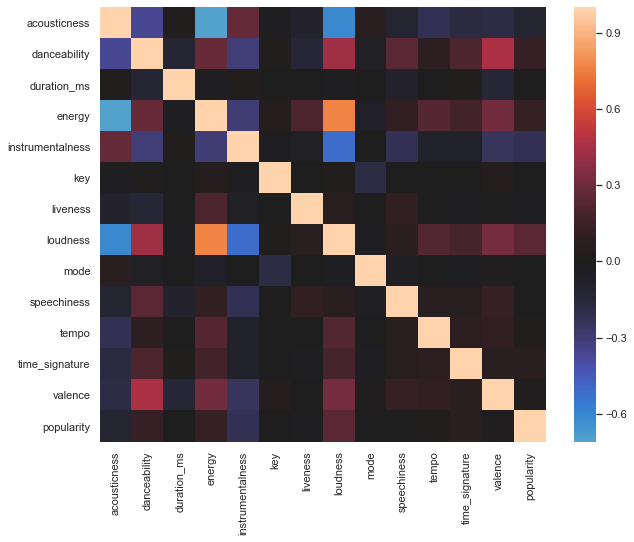

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), center=0)
plt.show()

## Train Test Split

In [17]:
X = df.drop("popularity", 1)
y = df["popularity"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Decision Tree Regressor

In [46]:
start_time = time.time()

dcr = DecisionTreeRegressor()
dcr.fit(X_train, y_train)
print(dcr.score(X_train, y_train))

print("--- %s seconds ---" % (time.time() - start_time))

0.9975398375847923
--- 1.3912804126739502 seconds ---


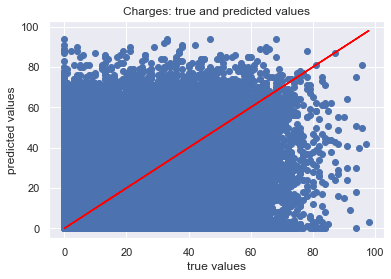

Mean absolute error of the prediction is: 19.621556186283456
Mean squared error of the prediction is: 644.5989124297873
Root mean squared error of the prediction is: 25.38895256661423
Mean absolute percentage error of the prediction is: inf


In [47]:
y_preds = dcr.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Terrible performance with a single decision tree. Lets see how a random forest improves the test scores.

## Random Forest Regressor

In [48]:
start_time = time.time()

rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))

print("--- %s seconds ---" % (time.time() - start_time))

0.8818295423142584
--- 19.341247081756592 seconds ---


In [49]:
rfr.score(X_test, y_test)

0.17418842089504294

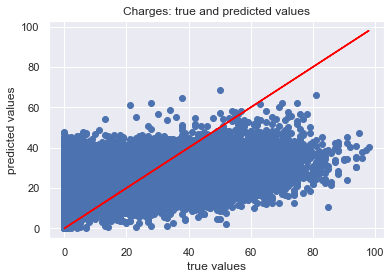

Mean absolute error of the prediction is: 14.485816615523142
Mean squared error of the prediction is: 321.4762992073384
Root mean squared error of the prediction is: 17.92976015476332
Mean absolute percentage error of the prediction is: inf


In [50]:
y_preds = rfr.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

## Discussion

Significant improvements, but still not satisfactory. I'll be interested to see if this dataset is better suited for another model type, or if feature engineering can be done to help better predict the popularity, or if this is a lost cause.